## Training

### FaceNet + RetinaFace

In [31]:
# develop a classifier for the 5 Celebrity Faces Dataset
from numpy import load
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.cluster import KMeans
from sklearn.gaussian_process import GaussianProcessClassifier
# example of creating a face embedding
#from keras_vggface.vggface import VGGFace
#from keras_vggface.utils import preprocess_input
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
# load dataset
#EMBEDDINGS DATA
data = load('FaceNet+RetinaFace+Faces96+Lengkap100_embeddings.npz')
#trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
trainX, trainy, testX, testy, valX,valy, timeX,timey = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3'], data['arr_4'], data['arr_5'], data['arr_6'], data['arr_7']
#print('Dataset: train=%d, test=%d' % (trainX.shape[0], testX.shape[0]))
print('Dataset: train=%d, test=%d, val=%d' % (trainX.shape[0], testX.shape[0], valX.shape[0]))
# normalize input vectors
in_encoder = Normalizer(norm='l2')

#####

#print(trainX)
trainX = in_encoder.transform(trainX)
testX = in_encoder.transform(testX)
valX= in_encoder.transform(valX)
timeX= in_encoder.transform(timeX)


modela= SVC(kernel='linear', probability=True)

out_encoder = LabelEncoder()

out_encoder.fit(trainy)



trainy = out_encoder.transform(trainy)
testy = out_encoder.transform(testy)
valy= out_encoder.transform(valy)
timey = out_encoder.transform(timey)

#####
# fit model

#MODEL
model = MLPClassifier(solver='adam',
                        hidden_layer_sizes=(512, 512),
                        activation='relu',
                        learning_rate_init=0.001,
                        verbose=True,
                        tol= False,
                        #n_iter_no_change=5,
                        max_iter=20,
                        early_stopping=True,
                        warm_start=True
                        )

#history = modela.fit(trainX, trainy)
#print("test problem 0.8")
#MLPClassifier(activation= 'tanh',alpha= 0.05, hidden_layer_sizes= (100,), learning_rate= 'adaptive', solver= 'adam')
# ########################
# # parameter_space = {
# #     'criterion' : ['gini', 'entropy'],
# #     'splitter' : ['best', 'random'],
# #     'max_features' : ['auto', 'sqrt', 'log2'],
# # }
# # clf = GridSearchCV(model, parameter_space, n_jobs=-1, cv=2)
# # clf.fit(trainX, trainy)

# # # Best paramete set
# # print('Best parameters found:\n', clf.best_params_)

# # # All results
# # means = clf.cv_results_['mean_test_score']
# # stds = clf.cv_results_['std_test_score']
# # for mean, std, params in zip(means, stds, clf.cv_results_['params']):
# #     print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
# #######################
#KNeighborsClassifier(n_neighbors=3)
#82
#KNeighborsClassifier(n_neighbors=3)

history = model.fit(trainX, trainy)
#print("test problem 0.9")
# predict
yhat_train = model.predict(trainX)
# yhat_test = model.predict(testX)
# yhat_val= model.predict(valX)
# yhat_time=model.predict(timeX)
#print("test problem 1.0")
# score
score_train = accuracy_score(trainy, yhat_train)
# score_test = accuracy_score(testy, yhat_test)
# score_val= accuracy_score(valy, yhat_val)
# score_time = accuracy_score(timey,yhat_time)
# summarize
#print('Accuracy: train=%.3f, test=%.3f' % (score_train*100, score_test*100)) #  RANK 1 ACCURACY
#print('Accuracy RetinaFace+ ArcFace: train=%.3f, test=%.3f, val=%.3f' % (score_train*100, score_test*100, score_val*100)) #  RANK 1 ACCURACY
# print('validation loss=%.3f, validation accuracy=%.3f' % (model.loss_, model.validation_scores_[-1]))

# summarize
print('Accuracy RetinaFace+ FaceNet: train=%.3f' % (score_train*100)) #  RANK 1 ACCURACY
#print('Accuracy RetinaFace+ ArcFace: test=%.3f' % (score_test*100)) #  RANK 1 ACCURACY

print('validation loss=%.3f, validation accuracy=%.3f' % (model.loss_, model.validation_scores_[-1]))




# loss = model.loss_curve_
# val_score = model.validation_scores_
# iters = range(len(loss))
# plt.plot(iters, loss, 'r', label='validation loss')
# plt.title('validation loss')
# # plt.savefig('validation loss retinex dark_05.jpg')
# plt.legend()
# plt.figure()
# plt.plot(iters, val_score, 'b', label='Validation accuracy')
# plt.title('validation accuracy')
# # plt.savefig('validation accuracy retinex dark_05.jpg')
# plt.legend()
# plt.show()
# print(classification_report(yhat_test, testy))

# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']
# loss = history.history['loss']
# val_loss = history.history['val_loss']

# epochs = range(len(acc))

# plt.plot(epochs, acc, 'r', label='Training accuracy')
# plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
# plt.title('Training and validation accuracy')
# plt.legend(loc=0)
# plt.figure()

# plt.show()

# accuracy: (tp + tn) / (p + n)z
# accuracy = accuracy_score(testy, yhat_test)
# print('Accuracy: %f' % (accuracy *100))
# # precision tp / (tp + fp)
# precision = precision_score(testy, yhat_test, pos_label='positive', average='micro')
# print('Precision: %f' % (precision *100))
# # recall: tp / (tp + fn)
# recall = recall_score(testy, yhat_test, pos_label='positive', average='micro')
# print('Recall: %f' % (recall *100))
# # f1: 2 tp / (2 tp + fp + fn)
# f1 = f1_score(testy, yhat_test, pos_label='positive', average='micro')
# print('F1 score: %f' % (f1 *100))

# print('Mean Absolute Error : ', mean_absolute_error(testy, yhat_test))
# print('Mean Squared Error  : ', mean_squared_error(testy, yhat_test))
# print('R2                  : ', r2_score(testy, yhat_test))
# y_true, y_pred = testy , clf.predict(testX)

# from sklearn.metrics import classification_report
# print('Results on the test set:')
# print(classification_report(y_true, y_pred))

Dataset: train=2714, test=908, val=903
Iteration 1, loss = 5.33899297
Validation score: 0.250000
Iteration 2, loss = 5.01181778
Validation score: 0.132353
Iteration 3, loss = 4.35127349
Validation score: 0.426471
Iteration 4, loss = 3.10931871
Validation score: 0.908088
Iteration 5, loss = 1.42951351
Validation score: 0.985294
Iteration 6, loss = 0.38904572
Validation score: 0.985294
Iteration 7, loss = 0.12759756
Validation score: 0.985294
Iteration 8, loss = 0.07508011
Validation score: 0.985294
Iteration 9, loss = 0.05455136
Validation score: 0.985294
Iteration 10, loss = 0.05065889
Validation score: 0.985294
Iteration 11, loss = 0.04104950
Validation score: 0.985294
Iteration 12, loss = 0.04235983
Validation score: 0.985294
Iteration 13, loss = 0.03785168
Validation score: 0.985294
Iteration 14, loss = 0.03331758
Validation score: 0.981618
Iteration 15, loss = 0.02806954
Validation score: 0.981618
Iteration 16, loss = 0.02818907
Validation score: 0.985294
Iteration 17, loss = 0.026

c:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


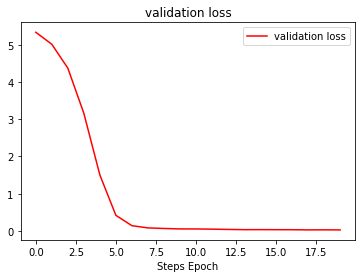

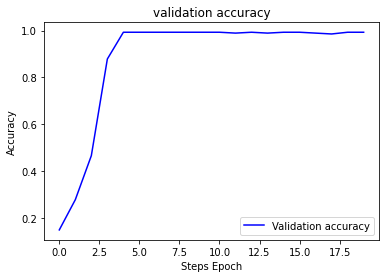

In [36]:
loss = model.loss_curve_
val_score = model.validation_scores_
iters = range(len(loss))
plt.plot(iters, loss, 'r', label='validation loss')
plt.title('validation loss')
plt.title('validation loss')
plt.xlabel('Steps Epoch')
#plt.savefig('1validation loss FaceNet Best.jpg')
plt.legend()
plt.figure()
plt.plot(iters, val_score, 'b', label='Validation accuracy')
plt.title('validation accuracy')
plt.xlabel('Steps Epoch')
plt.ylabel('Accuracy')
#plt.savefig('1validation accuracy FaceNet Best.jpg')
plt.legend()
plt.show()
#print(classification_report(yhat_test, testy))

# acc = history['accuracy']
# val_acc = history['val_accuracy']
# loss = history['loss']
# val_loss = history['val_loss']

# epochs = range(len(acc))

# plt.plot(epochs, acc, 'r', label='Training accuracy')
# plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
# plt.title('Training and validation accuracy')
# plt.legend(loc=0)
# plt.figure()

# plt.show()

### ArcFace + RetinaFace

In [198]:
# develop a classifier for the 5 Celebrity Faces Dataset
from numpy import load
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.cluster import KMeans
from sklearn.gaussian_process import GaussianProcessClassifier
# example of creating a face embedding
#from keras_vggface.vggface import VGGFace
#from keras_vggface.utils import preprocess_input
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
# load dataset
#EMBEDDINGS DATA
data = load('ArcFace+RetinaFace+Faces96+Lengkap100_embeddings.npz')
#trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
trainX, trainy, testX, testy, valX,valy, timeX,timey = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3'], data['arr_4'], data['arr_5'], data['arr_6'], data['arr_7']
#print('Dataset: train=%d, test=%d' % (trainX.shape[0], testX.shape[0]))
print('Dataset: train=%d, test=%d, val=%d' % (trainX.shape[0], testX.shape[0], valX.shape[0]))
# normalize input vectors
in_encoder = Normalizer(norm='l2')

#####

#print(trainX)
trainX = in_encoder.transform(trainX)
testX = in_encoder.transform(testX)
valX= in_encoder.transform(valX)
timeX= in_encoder.transform(timeX)


modela= SVC(kernel='linear', probability=True)

out_encoder = LabelEncoder()

out_encoder.fit(trainy)



trainy = out_encoder.transform(trainy)
testy = out_encoder.transform(testy)
valy= out_encoder.transform(valy)
timey = out_encoder.transform(timey)

#####
# fit model

#MODEL
modelArcFace_Retina = MLPClassifier(solver='adam',
                        hidden_layer_sizes=(512, 512),
                        activation='relu',
                        learning_rate_init=0.001,
                        verbose=True,
                        tol= 1e-100,
                        n_iter_no_change=5,
                        max_iter=100,
                        early_stopping=True,
                        warm_start=True
                        )



history = modelArcFace_Retina.fit(trainX, trainy)
#print("test problem 0.9")
# predict
yhat_train = modelArcFace_Retina.predict(trainX)
# yhat_test = modelArcFace_Retina.predict(testX)
# yhat_val= modelArcFace_Retina.predict(valX)
# yhat_time=modelArcFace_Retina.predict(timeX)
#print("test problem 1.0")
# score
score_train = accuracy_score(trainy, yhat_train)
# score_test = accuracy_score(testy, yhat_test)
# score_val= accuracy_score(valy, yhat_val)
# score_time = accuracy_score(timey,yhat_time)
# summarize
#print('Accuracy: train=%.3f, test=%.3f' % (score_train*100, score_test*100)) #  RANK 1 ACCURACY
#print('Accuracy RetinaFace+ ArcFace: train=%.3f, test=%.3f, val=%.3f' % (score_train*100, score_test*100, score_val*100)) #  RANK 1 ACCURACY
# print('validation loss=%.3f, validation accuracy=%.3f' % (model.loss_, model.validation_scores_[-1]))

# summarize
print('Accuracy  RetinaFace + ArcFace: train=%.3f' % (score_train*100)) #  RANK 1 ACCURACY
#print('validation loss=%.3f, validation accuracy=%.3f' % (modelArcFace_Retina.loss_, modelArcFace_Retina.validation_scores_[-1]))





Dataset: train=2714, test=908, val=903
Iteration 1, loss = 5.40799945
Validation score: 0.022059
Iteration 2, loss = 5.33094064
Validation score: 0.029412
Iteration 3, loss = 5.13598458
Validation score: 0.044118
Iteration 4, loss = 4.63521003
Validation score: 0.066176
Iteration 5, loss = 3.87780261
Validation score: 0.198529
Iteration 6, loss = 3.22804819
Validation score: 0.327206
Iteration 7, loss = 2.75395915
Validation score: 0.426471
Iteration 8, loss = 2.37621204
Validation score: 0.485294
Iteration 9, loss = 2.06642691
Validation score: 0.525735
Iteration 10, loss = 1.81896269
Validation score: 0.617647
Iteration 11, loss = 1.59685287
Validation score: 0.665441
Iteration 12, loss = 1.39537637
Validation score: 0.713235
Iteration 13, loss = 1.22600225
Validation score: 0.742647
Iteration 14, loss = 1.08610559
Validation score: 0.742647
Iteration 15, loss = 0.97833187
Validation score: 0.797794
Iteration 16, loss = 0.87213261
Validation score: 0.827206
Iteration 17, loss = 0.769

#### Plotting

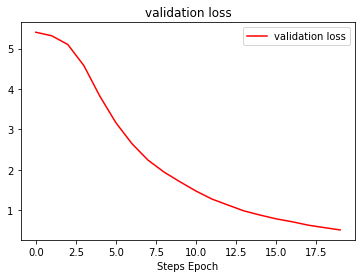

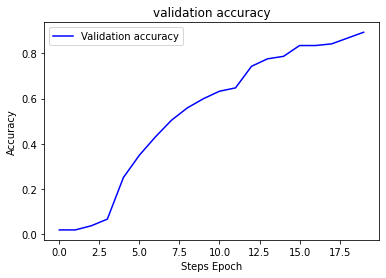

In [45]:
loss2 = modelArcFace_Retina.loss_curve_
val_score2 = modelArcFace_Retina.validation_scores_
iters2 = range(len(loss2))
plt.plot(iters2, loss2, 'r', label='validation loss')
plt.title('validation loss')
plt.title('validation loss')
plt.xlabel('Steps Epoch')
#plt.savefig('2validation loss ArcFace+Retina Best.jpg')
plt.legend()
plt.figure()
plt.plot(iters2, val_score2, 'b', label='Validation accuracy')
plt.title('validation accuracy')
plt.xlabel('Steps Epoch')
plt.ylabel('Accuracy')
#plt.savefig('2validation accuracy ArcFace+Retina Best.jpg')
plt.legend()
plt.show()
#print(classification_report(yhat_test, testy))

# acc = history['accuracy']
# val_acc = history['val_accuracy']
# loss = history['loss']
# val_loss = history['val_loss']

# epochs = range(len(acc))

# plt.plot(epochs, acc, 'r', label='Training accuracy')
# plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
# plt.title('Training and validation accuracy')
# plt.legend(loc=0)
# plt.figure()

# plt.show()

### MTCNN+FaceNet

In [209]:
# develop a classifier for the 5 Celebrity Faces Dataset
from numpy import load
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.cluster import KMeans
from sklearn.gaussian_process import GaussianProcessClassifier
# example of creating a face embedding
#from keras_vggface.vggface import VGGFace
#from keras_vggface.utils import preprocess_input
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
# load dataset
#EMBEDDINGS DATA
data = load('FaceNet+MTCNN+Faces96+Lengkap100_embeddings.npz')
#trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
trainX, trainy, testX, testy, valX,valy, timeX,timey = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3'], data['arr_4'], data['arr_5'], data['arr_6'], data['arr_7']
#print('Dataset: train=%d, test=%d' % (trainX.shape[0], testX.shape[0]))
print('Dataset: train=%d, test=%d, val=%d' % (trainX.shape[0], testX.shape[0], valX.shape[0]))
# normalize input vectors
in_encoder = Normalizer(norm='l2')

#####

#print(trainX)
trainX = in_encoder.transform(trainX)
testX = in_encoder.transform(testX)
valX= in_encoder.transform(valX)
timeX= in_encoder.transform(timeX)


modela= SVC(kernel='linear', probability=True)

out_encoder = LabelEncoder()

out_encoder.fit(trainy)



trainy = out_encoder.transform(trainy)
testy = out_encoder.transform(testy)
valy= out_encoder.transform(valy)
timey = out_encoder.transform(timey)

#####
# fit model

#MODEL
modelMTCNN_FaceNet = MLPClassifier(solver='adam',
                        hidden_layer_sizes=(512, 512),
                        activation='relu',
                        learning_rate_init=0.001,
                        verbose=True,
                        tol= 1e-100,
                        n_iter_no_change=5,
                        max_iter=100,
                        early_stopping=True,
                        warm_start=True
                        )



history = modelMTCNN_FaceNet.fit(trainX, trainy)
#print("test problem 0.9")
# predict
yhat_train = modelMTCNN_FaceNet.predict(trainX)
# yhat_test = modelMTCNN_FaceNet.predict(testX)
yhat_val= modelMTCNN_FaceNet.predict(valX)
# yhat_time=modelMTCNN_FaceNet.predict(timeX)
#print("test problem 1.0")
# score
score_train = accuracy_score(trainy, yhat_train)
# score_test = accuracy_score(testy, yhat_test)
score_val= accuracy_score(valy, yhat_val)
# score_time = accuracy_score(timey,yhat_time)
# summarize
#print('Accuracy: train=%.3f, test=%.3f' % (score_train*100, score_test*100)) #  RANK 1 ACCURACY
#print('Accuracy RetinaFace+ ArcFace: train=%.3f, test=%.3f, val=%.3f' % (score_train*100, score_test*100, score_val*100)) #  RANK 1 ACCURACY
# print('validation loss=%.3f, validation accuracy=%.3f' % (model.loss_, model.validation_scores_[-1]))

# summarize
print('Accuracy FaceNet+MTCNN: train=%.3f, val=%.3f' % (score_train*100, score_val*100)) #  RANK 1 ACCURACY
#print('validation loss=%.3f, validation accuracy=%.3f' % (modelFaceNet_MTCNN.loss_, modelFaceNet_MTCNN.validation_scores_[-1]))





Dataset: train=2714, test=908, val=902
Iteration 1, loss = 5.33571804
Validation score: 0.080882
Iteration 2, loss = 5.00717628
Validation score: 0.139706
Iteration 3, loss = 4.36102558
Validation score: 0.496324
Iteration 4, loss = 3.15768489
Validation score: 0.878676
Iteration 5, loss = 1.53323222
Validation score: 0.985294
Iteration 6, loss = 0.46372542
Validation score: 0.985294
Iteration 7, loss = 0.15510905
Validation score: 0.985294
Iteration 8, loss = 0.08269392
Validation score: 0.985294
Iteration 9, loss = 0.05858151
Validation score: 0.985294
Iteration 10, loss = 0.04764019
Validation score: 0.985294
Iteration 11, loss = 0.04985907
Validation score: 0.985294
Iteration 12, loss = 0.03896903
Validation score: 0.985294
Iteration 13, loss = 0.03614702
Validation score: 0.985294
Iteration 14, loss = 0.03306828
Validation score: 0.981618
Iteration 15, loss = 0.03351243
Validation score: 0.985294
Iteration 16, loss = 0.02649372
Validation score: 0.981618
Iteration 17, loss = 0.028

####  Plotting

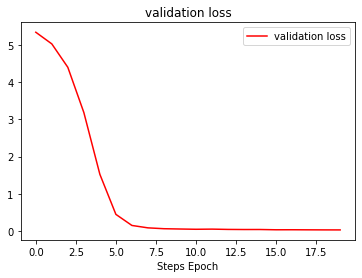

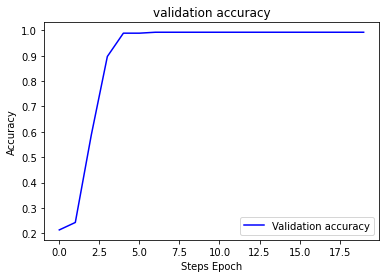

In [42]:
loss3 = modelFaceNet_MTCNN.loss_curve_
val_score3 = modelFaceNet_MTCNN.validation_scores_
iters3 = range(len(loss3))
plt.plot(iters3, loss3, 'r', label='validation loss')
plt.title('validation loss')
plt.title('validation loss')
plt.xlabel('Steps Epoch')
#plt.savefig('2validation loss ArcFace+Retina Best.jpg')
plt.legend()
plt.figure()
plt.plot(iters3, val_score3, 'b', label='Validation accuracy')
plt.title('validation accuracy')
plt.xlabel('Steps Epoch')
plt.ylabel('Accuracy')
#plt.savefig('2validation accuracy ArcFace+Retina Best.jpg')
plt.legend()
plt.show()
#print(classification_report(yhat_test, testy))

# acc = history['accuracy']
# val_acc = history['val_accuracy']
# loss = history['loss']
# val_loss = history['val_loss']

# epochs = range(len(acc))

# plt.plot(epochs, acc, 'r', label='Training accuracy')
# plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
# plt.title('Training and validation accuracy')
# plt.legend(loc=0)
# plt.figure()

# plt.show()

### MTCNN + ArcFace

In [220]:
# develop a classifier for the 5 Celebrity Faces Dataset
from numpy import load
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.cluster import KMeans
from sklearn.gaussian_process import GaussianProcessClassifier
# example of creating a face embedding
#from keras_vggface.vggface import VGGFace
#from keras_vggface.utils import preprocess_input
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
# load dataset
#EMBEDDINGS DATA
data = load('ArcFace+MTCNN+Faces96+Lengkap100_embeddings.npz')
#trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
trainX, trainy, testX, testy, valX,valy, timeX,timey = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3'], data['arr_4'], data['arr_5'], data['arr_6'], data['arr_7']
#print('Dataset: train=%d, test=%d' % (trainX.shape[0], testX.shape[0]))
print('Dataset: train=%d, test=%d, val=%d' % (trainX.shape[0], testX.shape[0], valX.shape[0]))
# normalize input vectors
in_encoder = Normalizer(norm='l2')

#####

#print(trainX)
trainX = in_encoder.transform(trainX)
testX = in_encoder.transform(testX)
valX= in_encoder.transform(valX)
timeX= in_encoder.transform(timeX)


modela= SVC(kernel='linear', probability=True)

out_encoder = LabelEncoder()

out_encoder.fit(trainy)



trainy = out_encoder.transform(trainy)
testy = out_encoder.transform(testy)
valy= out_encoder.transform(valy)
timey = out_encoder.transform(timey)

#####
# fit model

#MODEL
modelArcFace_MTCNN = MLPClassifier(solver='adam',
                        hidden_layer_sizes=(512, 512),
                        activation='relu',
                        learning_rate_init=0.001,
                        verbose=True,
                        tol= 1e-100,
                        n_iter_no_change=5,
                        max_iter=100,
                        early_stopping=True,
                        warm_start=True
                        )



history = modelArcFace_MTCNN.fit(trainX, trainy)
#print("test problem 0.9")
# predict
yhat_train = modelArcFace_MTCNN.predict(trainX)
#yhat_test = modelArcFace_MTCNN.predict(testX)
yhat_val= modelArcFace_MTCNN.predict(valX)
#yhat_time=modelArcFace_MTCNN.predict(timeX)
#print("test problem 1.0")
# score
score_train = accuracy_score(trainy, yhat_train)
#score_test = accuracy_score(testy, yhat_test)
score_val= accuracy_score(valy, yhat_val)
#score_time = accuracy_score(timey,yhat_time)
# summarize
#print('Accuracy: train=%.3f, test=%.3f' % (score_train*100, score_test*100)) #  RANK 1 ACCURACY
#print('Accuracy RetinaFace+ ArcFace: train=%.3f, test=%.3f, val=%.3f' % (score_train*100, score_test*100, score_val*100)) #  RANK 1 ACCURACY
# print('validation loss=%.3f, validation accuracy=%.3f' % (model.loss_, model.validation_scores_[-1]))

# summarize
print('Accuracy MTCNN + ArcFace: train=%.3f val=%.3f' % (score_train*100,score_val*100)) #  RANK 1 ACCURACY
#print('validation loss=%.3f, validation accuracy=%.3f' % (modelArcFace_MTCNN.loss_, modelArcFace_MTCNN.validation_scores_[-1]))





Dataset: train=2714, test=908, val=902
Iteration 1, loss = 5.40779118
Validation score: 0.029412
Iteration 2, loss = 5.32694857
Validation score: 0.036765
Iteration 3, loss = 5.13352591
Validation score: 0.040441
Iteration 4, loss = 4.64637438
Validation score: 0.099265
Iteration 5, loss = 3.90029482
Validation score: 0.216912
Iteration 6, loss = 3.25743222
Validation score: 0.264706
Iteration 7, loss = 2.78783959
Validation score: 0.297794
Iteration 8, loss = 2.43697493
Validation score: 0.371324
Iteration 9, loss = 2.15347380
Validation score: 0.470588
Iteration 10, loss = 1.91020377
Validation score: 0.511029
Iteration 11, loss = 1.66920627
Validation score: 0.613971
Iteration 12, loss = 1.50872044
Validation score: 0.602941
Iteration 13, loss = 1.34784436
Validation score: 0.591912
Iteration 14, loss = 1.18382247
Validation score: 0.698529
Iteration 15, loss = 1.06943384
Validation score: 0.669118
Iteration 16, loss = 0.95511322
Validation score: 0.757353
Iteration 17, loss = 0.847

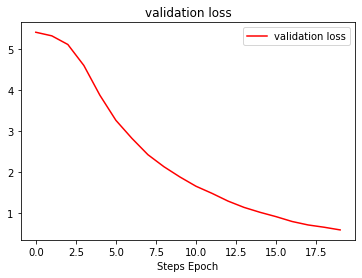

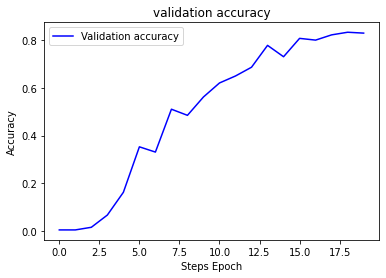

In [48]:
loss4 = modelArcFace_MTCNN.loss_curve_
val_score4 = modelArcFace_MTCNN.validation_scores_
iters4 = range(len(loss4))
plt.plot(iters4, loss4, 'r', label='validation loss')
plt.title('validation loss')
plt.title('validation loss')
plt.xlabel('Steps Epoch')
#plt.savefig('2validation loss ArcFace+Retina Best.jpg')
plt.legend()
plt.figure()
plt.plot(iters4, val_score4, 'b', label='Validation accuracy')
plt.title('validation accuracy')
plt.xlabel('Steps Epoch')
plt.ylabel('Accuracy')
#plt.savefig('2validation accuracy ArcFace+Retina Best.jpg')
plt.legend()
plt.show()
#print(classification_report(yhat_test, testy))

# acc = history['accuracy']
# val_acc = history['val_accuracy']
# loss = history['loss']
# val_loss = history['val_loss']

# epochs = range(len(acc))

# plt.plot(epochs, acc, 'r', label='Training accuracy')
# plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
# plt.title('Training and validation accuracy')
# plt.legend(loc=0)
# plt.figure()

# plt.show()

# Validasi

Kesimpulan Parameter terbaik di learning rate 0.001

## FaceNet + RetinaFace

### lr 0.1

In [85]:
# develop a classifier for the 5 Celebrity Faces Dataset
from numpy import load
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.cluster import KMeans
from sklearn.gaussian_process import GaussianProcessClassifier
# example of creating a face embedding
#from keras_vggface.vggface import VGGFace
#from keras_vggface.utils import preprocess_input
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
# load dataset
#EMBEDDINGS DATA
data = load('FaceNet+RetinaFace+Faces96+Lengkap100_embeddings.npz')
#trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
trainX, trainy, testX, testy, valX,valy, timeX,timey = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3'], data['arr_4'], data['arr_5'], data['arr_6'], data['arr_7']
#print('Dataset: train=%d, test=%d' % (trainX.shape[0], testX.shape[0]))
print('Dataset: train=%d, test=%d, val=%d' % (trainX.shape[0], testX.shape[0], valX.shape[0]))
# normalize input vectors
in_encoder = Normalizer(norm='l2')

#####

#print(trainX)
trainX = in_encoder.transform(trainX)
testX = in_encoder.transform(testX)
valX= in_encoder.transform(valX)
timeX= in_encoder.transform(timeX)


modela= SVC(kernel='linear', probability=True)

out_encoder = LabelEncoder()

out_encoder.fit(trainy)



trainy = out_encoder.transform(trainy)
testy = out_encoder.transform(testy)
valy= out_encoder.transform(valy)
timey = out_encoder.transform(timey)

#####
# fit model

#MODEL
modelLR1 = MLPClassifier(solver='adam',
                        hidden_layer_sizes=(512, 512),
                        activation='relu',
                        learning_rate_init=0.1,
                        verbose=True,
                        tol= False,
                        #n_iter_no_change=5,
                        max_iter=10,
                        early_stopping=True,
                        warm_start=True
                        )

#history = modela.fit(trainX, trainy)
#print("test problem 0.8")
#MLPClassifier(activation= 'tanh',alpha= 0.05, hidden_layer_sizes= (100,), learning_rate= 'adaptive', solver= 'adam')
# ########################
# # parameter_space = {
# #     'criterion' : ['gini', 'entropy'],
# #     'splitter' : ['best', 'random'],
# #     'max_features' : ['auto', 'sqrt', 'log2'],
# # }
# # clf = GridSearchCV(model, parameter_space, n_jobs=-1, cv=2)
# # clf.fit(trainX, trainy)

# # # Best paramete set
# # print('Best parameters found:\n', clf.best_params_)

# # # All results
# # means = clf.cv_results_['mean_test_score']
# # stds = clf.cv_results_['std_test_score']
# # for mean, std, params in zip(means, stds, clf.cv_results_['params']):
# #     print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
# #######################
#KNeighborsClassifier(n_neighbors=3)
#82
#KNeighborsClassifier(n_neighbors=3)



history = modelLR1.fit(trainX, trainy)
#print("test problem 0.9")
# predict
#yhat_train = modelTesting1.predict(trainX)
#yhat_test = modelTesting1.predict(testX)
yhat_val= modelLR1.predict(valX)
#yhat_time=modelTesting1.predict(timeX)
#print("test problem 1.0")
# score
#score_train = accuracy_score(trainy, yhat_train)
#score_test = accuracy_score(testy, yhat_test)
score_val= accuracy_score(valy, yhat_val)
#score_time = accuracy_score(timey,yhat_time)
# summarize
#print('Accuracy: train=%.3f, test=%.3f' % (score_train*100, score_test*100)) #  RANK 1 ACCURACY
#print('Accuracy RetinaFace+ ArcFace: train=%.3f, test=%.3f, val=%.3f' % (score_train*100, score_test*100, score_val*100)) #  RANK 1 ACCURACY
# print('validation loss=%.3f, validation accuracy=%.3f' % (model.loss_, model.validation_scores_[-1]))

# summarize
print('Accuracy RetinaFace+ FaceNet: val=%.3f' % (score_val*100)) #  RANK 1 ACCURACY
print('validation loss=%.3f, validation accuracy=%.3f' % (modelLR1.loss_, modelLR1.validation_scores_[-1]))


Dataset: train=2714, test=908, val=903
Iteration 1, loss = 6.06741190
Validation score: 0.371324
Iteration 2, loss = 1.40928300
Validation score: 0.856618
Iteration 3, loss = 0.49896081
Validation score: 0.882353
Iteration 4, loss = 0.54384660
Validation score: 0.911765
Iteration 5, loss = 0.57530865
Validation score: 0.908088
Iteration 6, loss = 0.64211452
Validation score: 0.852941
Iteration 7, loss = 0.78618294
Validation score: 0.849265
Iteration 8, loss = 0.76621367
Validation score: 0.904412
Iteration 9, loss = 0.78444928
Validation score: 0.911765
Iteration 10, loss = 0.74200771
Validation score: 0.911765
Accuracy RetinaFace+ FaceNet: val=88.926
validation loss=0.742, validation accuracy=0.912


c:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


### lr 0.01

In [91]:
modelLR2 = MLPClassifier(solver='adam',
                        hidden_layer_sizes=(512, 512),
                        activation='relu',
                        learning_rate_init=0.01,
                        verbose=True,
                        #toTruel= ,
                        #n_iter_no_change=5,
                        max_iter=10,
                        early_stopping=True,
                        warm_start=True
                        )

#history = modela.fit(trainX, trainy)
#print("test problem 0.8")
#MLPClassifier(activation= 'tanh',alpha= 0.05, hidden_layer_sizes= (100,), learning_rate= 'adaptive', solver= 'adam')
# ########################
# # parameter_space = {
# #     'criterion' : ['gini', 'entropy'],
# #     'splitter' : ['best', 'random'],
# #     'max_features' : ['auto', 'sqrt', 'log2'],
# # }
# # clf = GridSearchCV(model, parameter_space, n_jobs=-1, cv=2)
# # clf.fit(trainX, trainy)

# # # Best paramete set
# # print('Best parameters found:\n', clf.best_params_)

# # # All results
# # means = clf.cv_results_['mean_test_score']
# # stds = clf.cv_results_['std_test_score']
# # for mean, std, params in zip(means, stds, clf.cv_results_['params']):
# #     print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
# #######################
#KNeighborsClassifier(n_neighbors=3)
#82
#KNeighborsClassifier(n_neighbors=3)



history = modelLR2.fit(trainX, trainy)
#print("test problem 0.9")
# predict
#yhat_train = modelTesting1.predict(trainX)
#yhat_test = modelTesting1.predict(testX)
yhat_val= modelLR2.predict(valX)
#yhat_time=modelTesting1.predict(timeX)
#print("test problem 1.0")
# score
#score_train = accuracy_score(trainy, yhat_train)
#score_test = accuracy_score(testy, yhat_test)
score_val= accuracy_score(valy, yhat_val)
#score_time = accuracy_score(timey,yhat_time)
# summarize
#print('Accuracy: train=%.3f, test=%.3f' % (score_train*100, score_test*100)) #  RANK 1 ACCURACY
#print('Accuracy RetinaFace+ ArcFace: train=%.3f, test=%.3f, val=%.3f' % (score_train*100, score_test*100, score_val*100)) #  RANK 1 ACCURACY
# print('validation loss=%.3f, validation accuracy=%.3f' % (model.loss_, model.validation_scores_[-1]))

# summarize
print('Accuracy RetinaFace+ FaceNet: val=%.3f' % (score_val*100)) #  RANK 1 ACCURACY
print('validation loss=%.3f, validation accuracy=%.3f' % (modelLR2.loss_, modelLR2.validation_scores_[-1]))


Iteration 1, loss = 4.09859433
Validation score: 0.808824
Iteration 2, loss = 0.28772160
Validation score: 0.977941
Iteration 3, loss = 0.08584577
Validation score: 0.988971
Iteration 4, loss = 0.05914279
Validation score: 0.985294
Iteration 5, loss = 0.02656842
Validation score: 0.988971
Iteration 6, loss = 0.03102741
Validation score: 0.981618
Iteration 7, loss = 0.04911919
Validation score: 0.981618
Iteration 8, loss = 0.02892164
Validation score: 0.988971
Iteration 9, loss = 0.02191597
Validation score: 0.985294
Iteration 10, loss = 0.01533078
Validation score: 0.988971
Accuracy RetinaFace+ FaceNet: val=97.674
validation loss=0.015, validation accuracy=0.989


c:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


### lr 0.001

In [56]:
modelLR3 = MLPClassifier(solver='adam',
                        hidden_layer_sizes=(512, 512),
                        activation='relu',
                        learning_rate_init=0.001,
                        verbose=True,
                        #toTruel= ,
                        #n_iter_no_change=5,
                        max_iter=10,
                        early_stopping=True,
                        warm_start=True
                        )

#history = modela.fit(trainX, trainy)
#print("test problem 0.8")
#MLPClassifier(activation= 'tanh',alpha= 0.05, hidden_layer_sizes= (100,), learning_rate= 'adaptive', solver= 'adam')
# ########################
# # parameter_space = {
# #     'criterion' : ['gini', 'entropy'],
# #     'splitter' : ['best', 'random'],
# #     'max_features' : ['auto', 'sqrt', 'log2'],
# # }
# # clf = GridSearchCV(model, parameter_space, n_jobs=-1, cv=2)
# # clf.fit(trainX, trainy)

# # # Best paramete set
# # print('Best parameters found:\n', clf.best_params_)

# # # All results
# # means = clf.cv_results_['mean_test_score']
# # stds = clf.cv_results_['std_test_score']
# # for mean, std, params in zip(means, stds, clf.cv_results_['params']):
# #     print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
# #######################
#KNeighborsClassifier(n_neighbors=3)
#82
#KNeighborsClassifier(n_neighbors=3)



history = modelLR3.fit(trainX, trainy)
#print("test problem 0.9")
# predict
#yhat_train = modelTesting1.predict(trainX)
#yhat_test = modelTesting1.predict(testX)
yhat_val= modelLR3.predict(valX)
#yhat_time=modelTesting1.predict(timeX)
#print("test problem 1.0")
# score
#score_train = accuracy_score(trainy, yhat_train)
#score_test = accuracy_score(testy, yhat_test)
score_val= accuracy_score(valy, yhat_val)
#score_time = accuracy_score(timey,yhat_time)
# summarize
#print('Accuracy: train=%.3f, test=%.3f' % (score_train*100, score_test*100)) #  RANK 1 ACCURACY
#print('Accuracy RetinaFace+ ArcFace: train=%.3f, test=%.3f, val=%.3f' % (score_train*100, score_test*100, score_val*100)) #  RANK 1 ACCURACY
# print('validation loss=%.3f, validation accuracy=%.3f' % (model.loss_, model.validation_scores_[-1]))

# summarize
print('Accuracy RetinaFace+ FaceNet: val=%.3f' % (score_val*100)) #  RANK 1 ACCURACY
print('validation loss=%.3f, validation accuracy=%.3f' % (modelLR3.loss_, modelLR3.validation_scores_[-1]))


Iteration 1, loss = 5.33184514
Validation score: 0.294118
Iteration 2, loss = 4.99229207
Validation score: 0.268382
Iteration 3, loss = 4.31539335
Validation score: 0.588235
Iteration 4, loss = 3.05816813
Validation score: 0.952206
Iteration 5, loss = 1.39508604
Validation score: 0.981618
Iteration 6, loss = 0.38305440
Validation score: 0.981618
Iteration 7, loss = 0.12990793
Validation score: 0.985294
Iteration 8, loss = 0.07371712
Validation score: 0.985294
Iteration 9, loss = 0.05794248
Validation score: 0.985294
Iteration 10, loss = 0.04987899
Validation score: 0.981618
Accuracy RetinaFace+ FaceNet: val=99.003
validation loss=0.050, validation accuracy=0.982


c:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


## ArcFace + RetinaFace

### LR 0,1

In [93]:
# develop a classifier for the 5 Celebrity Faces Dataset
from numpy import load
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.cluster import KMeans
from sklearn.gaussian_process import GaussianProcessClassifier
# example of creating a face embedding
#from keras_vggface.vggface import VGGFace
#from keras_vggface.utils import preprocess_input
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
# load dataset
#EMBEDDINGS DATA
data = load('ArcFace+RetinaFace+Faces96+Lengkap100_embeddings.npz')
#trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
trainX, trainy, testX, testy, valX,valy, timeX,timey = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3'], data['arr_4'], data['arr_5'], data['arr_6'], data['arr_7']
#print('Dataset: train=%d, test=%d' % (trainX.shape[0], testX.shape[0]))
print('Dataset: train=%d, test=%d, val=%d' % (trainX.shape[0], testX.shape[0], valX.shape[0]))
# normalize input vectors
in_encoder = Normalizer(norm='l2')

#####

#print(trainX)
trainX = in_encoder.transform(trainX)
testX = in_encoder.transform(testX)
valX= in_encoder.transform(valX)
timeX= in_encoder.transform(timeX)


modela= SVC(kernel='linear', probability=True)

out_encoder = LabelEncoder()

out_encoder.fit(trainy)



trainy = out_encoder.transform(trainy)
testy = out_encoder.transform(testy)
valy= out_encoder.transform(valy)
timey = out_encoder.transform(timey)

#####
# fit model

#MODEL
modelLR4 = MLPClassifier(solver='adam',
                        hidden_layer_sizes=(512, 512),
                        activation='relu',
                        learning_rate_init=0.1,
                        verbose=True,
                        tol= False,
                        #n_iter_no_change=5,
                        max_iter=10,
                        early_stopping=True,
                        warm_start=True
                        )

#history = modela.fit(trainX, trainy)
#print("test problem 0.8")
#MLPClassifier(activation= 'tanh',alpha= 0.05, hidden_layer_sizes= (100,), learning_rate= 'adaptive', solver= 'adam')
# ########################
# # parameter_space = {
# #     'criterion' : ['gini', 'entropy'],
# #     'splitter' : ['best', 'random'],
# #     'max_features' : ['auto', 'sqrt', 'log2'],
# # }
# # clf = GridSearchCV(model, parameter_space, n_jobs=-1, cv=2)
# # clf.fit(trainX, trainy)

# # # Best paramete set
# # print('Best parameters found:\n', clf.best_params_)

# # # All results
# # means = clf.cv_results_['mean_test_score']
# # stds = clf.cv_results_['std_test_score']
# # for mean, std, params in zip(means, stds, clf.cv_results_['params']):
# #     print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
# #######################
#KNeighborsClassifier(n_neighbors=3)
#82
#KNeighborsClassifier(n_neighbors=3)



history = modelLR4.fit(trainX, trainy)
#print("test problem 0.9")
# predict
#yhat_train = modelTesting1.predict(trainX)
#yhat_test = modelTesting1.predict(testX)
yhat_val= modelLR4.predict(valX)
#yhat_time=modelTesting1.predict(timeX)
#print("test problem 1.0")
# score
#score_train = accuracy_score(trainy, yhat_train)
#score_test = accuracy_score(testy, yhat_test)
score_val= accuracy_score(valy, yhat_val)
#score_time = accuracy_score(timey,yhat_time)
# summarize
#print('Accuracy: train=%.3f, test=%.3f' % (score_train*100, score_test*100)) #  RANK 1 ACCURACY
#print('Accuracy RetinaFace+ ArcFace: train=%.3f, test=%.3f, val=%.3f' % (score_train*100, score_test*100, score_val*100)) #  RANK 1 ACCURACY
# print('validation loss=%.3f, validation accuracy=%.3f' % (model.loss_, model.validation_scores_[-1]))

# summarize
print('Accuracy RetinaFace+ FaceNet: val=%.3f' % (score_val*100)) #  RANK 1 ACCURACY
print('validation loss=%.3f, validation accuracy=%.3f' % (modelLR4.loss_, modelLR4.validation_scores_[-1]))


Dataset: train=2714, test=908, val=903
Iteration 1, loss = 7.54735363
Validation score: 0.003676
Iteration 2, loss = 5.45799306
Validation score: 0.007353
Iteration 3, loss = 5.45954028
Validation score: 0.007353
Iteration 4, loss = 5.45658528
Validation score: 0.007353
Iteration 5, loss = 5.45275979
Validation score: 0.007353
Iteration 6, loss = 5.45078541
Validation score: 0.007353
Iteration 7, loss = 5.44834165
Validation score: 0.007353
Iteration 8, loss = 5.44900390
Validation score: 0.007353
Iteration 9, loss = 5.44853467
Validation score: 0.007353
Iteration 10, loss = 5.44493002
Validation score: 0.007353
Accuracy RetinaFace+ FaceNet: val=0.886
validation loss=5.445, validation accuracy=0.007


c:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


### LR 0,001

In [202]:
modelArcFace_Val = MLPClassifier(solver='adam',
                        hidden_layer_sizes=(512, 512),
                        activation='relu',
                        learning_rate_init=0.001,
                        verbose=True,
                        tol= 1e-100,
                        n_iter_no_change=5,
                        max_iter=100,
                        early_stopping=True,
                        warm_start=True
                        )

#history = modela.fit(trainX, trainy)
#print("test problem 0.8")
#MLPClassifier(activation= 'tanh',alpha= 0.05, hidden_layer_sizes= (100,), learning_rate= 'adaptive', solver= 'adam')
# ########################
# # parameter_space = {
# #     'criterion' : ['gini', 'entropy'],
# #     'splitter' : ['best', 'random'],
# #     'max_features' : ['auto', 'sqrt', 'log2'],
# # }
# # clf = GridSearchCV(model, parameter_space, n_jobs=-1, cv=2)
# # clf.fit(trainX, trainy)

# # # Best paramete set
# # print('Best parameters found:\n', clf.best_params_)

# # # All results
# # means = clf.cv_results_['mean_test_score']
# # stds = clf.cv_results_['std_test_score']
# # for mean, std, params in zip(means, stds, clf.cv_results_['params']):
# #     print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
# #######################
#KNeighborsClassifier(n_neighbors=3)
#82
#KNeighborsClassifier(n_neighbors=3)



history = modelArcFace_Val.fit(trainX, trainy)
#print("test problem 0.9")
# predict
#yhat_train = modelTesting1.predict(trainX)
#yhat_test = modelTesting1.predict(testX)
yhat_val= modelArcFace_Val.predict(valX)
#yhat_time=modelTesting1.predict(timeX)
#print("test problem 1.0")
# score
#score_train = accuracy_score(trainy, yhat_train)
#score_test = accuracy_score(testy, yhat_test)
score_val= accuracy_score(valy, yhat_val)
#score_time = accuracy_score(timey,yhat_time)
# summarize
#print('Accuracy: train=%.3f, test=%.3f' % (score_train*100, score_test*100)) #  RANK 1 ACCURACY
#print('Accuracy RetinaFace+ ArcFace: train=%.3f, test=%.3f, val=%.3f' % (score_train*100, score_test*100, score_val*100)) #  RANK 1 ACCURACY
# print('validation loss=%.3f, validation accuracy=%.3f' % (model.loss_, model.validation_scores_[-1]))

# summarize
print('Accuracy RetinaFace+ FaceNet: val=%.3f' % (score_val*100)) #  RANK 1 ACCURACY
#print('validation loss=%.3f, validation accuracy=%.3f' % (modelLR6.loss_, modelLR6.validation_scores_[-1]))


Iteration 1, loss = 5.40693749
Validation score: 0.011029
Iteration 2, loss = 5.31678389
Validation score: 0.007353
Iteration 3, loss = 5.09604349
Validation score: 0.011029
Iteration 4, loss = 4.57969107
Validation score: 0.051471
Iteration 5, loss = 3.84823721
Validation score: 0.176471
Iteration 6, loss = 3.19248339
Validation score: 0.341912
Iteration 7, loss = 2.68336867
Validation score: 0.378676
Iteration 8, loss = 2.28706290
Validation score: 0.474265
Iteration 9, loss = 1.98106948
Validation score: 0.584559
Iteration 10, loss = 1.72809299
Validation score: 0.555147
Iteration 11, loss = 1.50935321
Validation score: 0.691176
Iteration 12, loss = 1.31789086
Validation score: 0.709559
Iteration 13, loss = 1.18788584
Validation score: 0.753676
Iteration 14, loss = 1.02866363
Validation score: 0.727941
Iteration 15, loss = 0.90182803
Validation score: 0.790441
Iteration 16, loss = 0.79815068
Validation score: 0.819853
Iteration 17, loss = 0.71692727
Validation score: 0.823529
Iterat

## MTCNN + FaceNet

### LR 0,001

In [213]:
# develop a classifier for the 5 Celebrity Faces Dataset
from numpy import load
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.cluster import KMeans
from sklearn.gaussian_process import GaussianProcessClassifier
# example of creating a face embedding
#from keras_vggface.vggface import VGGFace
#from keras_vggface.utils import preprocess_input
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
# load dataset
#EMBEDDINGS DATA
data = load('FaceNet+MTCNN+Faces96+Lengkap100_embeddings.npz')
#trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
trainX, trainy, testX, testy, valX,valy, timeX,timey = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3'], data['arr_4'], data['arr_5'], data['arr_6'], data['arr_7']
#print('Dataset: train=%d, test=%d' % (trainX.shape[0], testX.shape[0]))
print('Dataset: train=%d, test=%d, val=%d' % (trainX.shape[0], testX.shape[0], valX.shape[0]))
# normalize input vectors
in_encoder = Normalizer(norm='l2')

#####

#print(trainX)
trainX = in_encoder.transform(trainX)
testX = in_encoder.transform(testX)
valX= in_encoder.transform(valX)
timeX= in_encoder.transform(timeX)


modela= SVC(kernel='linear', probability=True)

out_encoder = LabelEncoder()

out_encoder.fit(trainy)



trainy = out_encoder.transform(trainy)
testy = out_encoder.transform(testy)
valy= out_encoder.transform(valy)
timey = out_encoder.transform(timey)

#####
# fit model

#MODEL
modelLR9 = MLPClassifier(solver='adam',
                        hidden_layer_sizes=(512, 512),
                        activation='relu',
                        learning_rate_init=0.001,
                        verbose=True,
                        tol= False,
                        #n_iter_no_change=5,
                        max_iter=10,
                        early_stopping=True,
                        warm_start=True
                        )

#history = modela.fit(trainX, trainy)
#print("test problem 0.8")
#MLPClassifier(activation= 'tanh',alpha= 0.05, hidden_layer_sizes= (100,), learning_rate= 'adaptive', solver= 'adam')
# ########################
# # parameter_space = {
# #     'criterion' : ['gini', 'entropy'],
# #     'splitter' : ['best', 'random'],
# #     'max_features' : ['auto', 'sqrt', 'log2'],
# # }
# # clf = GridSearchCV(model, parameter_space, n_jobs=-1, cv=2)
# # clf.fit(trainX, trainy)

# # # Best paramete set
# # print('Best parameters found:\n', clf.best_params_)

# # # All results
# # means = clf.cv_results_['mean_test_score']
# # stds = clf.cv_results_['std_test_score']
# # for mean, std, params in zip(means, stds, clf.cv_results_['params']):
# #     print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
# #######################
#KNeighborsClassifier(n_neighbors=3)
#82
#KNeighborsClassifier(n_neighbors=3)



history = modelLR9.fit(trainX, trainy)
#print("test problem 0.9")
# predict
#yhat_train = modelTesting1.predict(trainX)
#yhat_test = modelTesting1.predict(testX)
yhat_val= modelLR9.predict(valX)
#yhat_time=modelTesting1.predict(timeX)
#print("test problem 1.0")
# score
#score_train = accuracy_score(trainy, yhat_train)
#score_test = accuracy_score(testy, yhat_test)
score_val= accuracy_score(valy, yhat_val)
#score_time = accuracy_score(timey,yhat_time)
# summarize
#print('Accuracy: train=%.3f, test=%.3f' % (score_train*100, score_test*100)) #  RANK 1 ACCURACY
#print('Accuracy RetinaFace+ ArcFace: train=%.3f, test=%.3f, val=%.3f' % (score_train*100, score_test*100, score_val*100)) #  RANK 1 ACCURACY
# print('validation loss=%.3f, validation accuracy=%.3f' % (model.loss_, model.validation_scores_[-1]))

# summarize
print('Accuracy RetinaFace+ FaceNet: val=%.3f' % (score_val*100)) #  RANK 1 ACCURACY
print('validation loss=%.3f, validation accuracy=%.3f' % (modelLR9.loss_, modelLR9.validation_scores_[-1]))


Dataset: train=2714, test=908, val=902
Iteration 1, loss = 5.34246534
Validation score: 0.044118
Iteration 2, loss = 5.03336955
Validation score: 0.158088
Iteration 3, loss = 4.41207181
Validation score: 0.503676
Iteration 4, loss = 3.22955307
Validation score: 0.904412
Iteration 5, loss = 1.56763510
Validation score: 1.000000
Iteration 6, loss = 0.45681184
Validation score: 1.000000
Iteration 7, loss = 0.14960358
Validation score: 1.000000
Iteration 8, loss = 0.08504144
Validation score: 1.000000
Iteration 9, loss = 0.06342023
Validation score: 1.000000
Iteration 10, loss = 0.05382812
Validation score: 1.000000
Accuracy RetinaFace+ FaceNet: val=98.670
validation loss=0.054, validation accuracy=1.000


c:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


## MTCNN + ArcFace

In [10]:
# develop a classifier for the 5 Celebrity Faces Dataset
from numpy import load
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.cluster import KMeans
from sklearn.gaussian_process import GaussianProcessClassifier
# example of creating a face embedding
#from keras_vggface.vggface import VGGFace
#from keras_vggface.utils import preprocess_input
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
# load dataset
#EMBEDDINGS DATA
data = load('ArcFace+MTCNN+Faces96+Lengkap100_embeddings.npz')
#trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
trainX, trainy, testX, testy, valX,valy, timeX,timey = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3'], data['arr_4'], data['arr_5'], data['arr_6'], data['arr_7']
#print('Dataset: train=%d, test=%d' % (trainX.shape[0], testX.shape[0]))
print('Dataset: train=%d, test=%d, val=%d' % (trainX.shape[0], testX.shape[0], valX.shape[0]))
# normalize input vectors
in_encoder = Normalizer(norm='l2')

#####

#print(trainX)
trainX = in_encoder.transform(trainX)
testX = in_encoder.transform(testX)
valX= in_encoder.transform(valX)
timeX= in_encoder.transform(timeX)


modela= SVC(kernel='linear', probability=True)

out_encoder = LabelEncoder()

out_encoder.fit(trainy)



trainy = out_encoder.transform(trainy)
testy = out_encoder.transform(testy)
valy= out_encoder.transform(valy)
timey = out_encoder.transform(timey)

#####
# fit model

#MODEL
modelLR12 = MLPClassifier(solver='adam',
                        hidden_layer_sizes=(512, 512),
                        activation='relu',
                        learning_rate_init=0.001,
                        verbose=True,
                        tol= 1e-100,
                        n_iter_no_change=5,
                        max_iter=100,
                        early_stopping=True,
                        warm_start=True
                        )

#history = modela.fit(trainX, trainy)
#print("test problem 0.8")
#MLPClassifier(activation= 'tanh',alpha= 0.05, hidden_layer_sizes= (100,), learning_rate= 'adaptive', solver= 'adam')
# ########################
# # parameter_space = {
# #     'criterion' : ['gini', 'entropy'],
# #     'splitter' : ['best', 'random'],
# #     'max_features' : ['auto', 'sqrt', 'log2'],
# # }
# # clf = GridSearchCV(model, parameter_space, n_jobs=-1, cv=2)
# # clf.fit(trainX, trainy)

# # # Best paramete set
# # print('Best parameters found:\n', clf.best_params_)

# # # All results
# # means = clf.cv_results_['mean_test_score']
# # stds = clf.cv_results_['std_test_score']
# # for mean, std, params in zip(means, stds, clf.cv_results_['params']):
# #     print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
# #######################
#KNeighborsClassifier(n_neighbors=3)
#82
#KNeighborsClassifier(n_neighbors=3)



history = modelLR12.fit(trainX, trainy)
#print("test problem 0.9")
# predict
#yhat_train = modelTesting1.predict(trainX)
#yhat_test = modelTesting1.predict(testX)
yhat_val= modelLR12.predict(valX)
#yhat_time=modelTesting1.predict(timeX)
#print("test problem 1.0")
# score
#score_train = accuracy_score(trainy, yhat_train)
#score_test = accuracy_score(testy, yhat_test)
score_val= accuracy_score(valy, yhat_val)
#score_time = accuracy_score(timey,yhat_time)
# summarize
#print('Accuracy: train=%.3f, test=%.3f' % (score_train*100, score_test*100)) #  RANK 1 ACCURACY
#print('Accuracy RetinaFace+ ArcFace: train=%.3f, test=%.3f, val=%.3f' % (score_train*100, score_test*100, score_val*100)) #  RANK 1 ACCURACY
# print('validation loss=%.3f, validation accuracy=%.3f' % (model.loss_, model.validation_scores_[-1]))

# summarize
print('Accuracy RetinaFace+ FaceNet: val=%.3f' % (score_val*100)) #  RANK 1 ACCURACY
#print('validation loss=%.3f, validation accuracy=%.3f' % (modelLR12.loss_, modelLR12.validation_scores_[-1]))


Dataset: train=2714, test=908, val=902
Iteration 1, loss = 5.40874687
Validation score: 0.007353
Iteration 2, loss = 5.32667394
Validation score: 0.007353
Iteration 3, loss = 5.12493658
Validation score: 0.007353
Iteration 4, loss = 4.63414665
Validation score: 0.058824
Iteration 5, loss = 3.92020744
Validation score: 0.216912
Iteration 6, loss = 3.31022542
Validation score: 0.294118
Iteration 7, loss = 2.85271128
Validation score: 0.430147
Iteration 8, loss = 2.49536934
Validation score: 0.474265
Iteration 9, loss = 2.19355097
Validation score: 0.529412
Iteration 10, loss = 1.91995017
Validation score: 0.595588
Iteration 11, loss = 1.69152421
Validation score: 0.650735
Iteration 12, loss = 1.46939206
Validation score: 0.709559
Iteration 13, loss = 1.29129171
Validation score: 0.680147
Iteration 14, loss = 1.16740479
Validation score: 0.727941
Iteration 15, loss = 1.03297666
Validation score: 0.801471
Iteration 16, loss = 0.93566381
Validation score: 0.779412
Iteration 17, loss = 0.825

# Testing

In [187]:

modelLR4 = MLPClassifier(solver='adam',
                        hidden_layer_sizes=(512, 512),
                        activation='relu',
                        learning_rate_init=0.001,
                        verbose=True,
                        tol= 1e-100,
                        n_iter_no_change=5,
                        max_iter=100,
                        early_stopping=True,
                        warm_start=True
                        )
history = modelLR4.fit(trainX, trainy)
#print("test problem 0.9")
# predict
yhat_train = modelLR4.predict(trainX)
yhat_test = modelLR4.predict(testX)
yhat_val= modelLR4.predict(valX)
yhat_time=modelLR4.predict(timeX)
#print("test problem 1.0")
# score
score_train = accuracy_score(trainy, yhat_train)
score_test = accuracy_score(testy, yhat_test)
score_val= accuracy_score(valy, yhat_val)
score_time = accuracy_score(timey,yhat_time)
# summarize
#print('Accuracy: train=%.3f, test=%.3f' % (score_train*100, score_test*100)) #  RANK 1 ACCURACY
#print('Accuracy RetinaFace+ ArcFace: train=%.3f, test=%.3f, val=%.3f' % (score_train*100, score_test*100, score_val*100)) #  RANK 1 ACCURACY
# print('validation loss=%.3f, validation accuracy=%.3f' % (model.loss_, model.validation_scores_[-1]))

# summarize
print('Accuracy RetinaFace+ FaceNet: train=%.3f, test=%.3f, val=%.3f' % (score_train*100, score_test*100, score_val*100)) #  RANK 1 ACCURACY

Iteration 1, loss = 5.33670816
Validation score: 0.102941
Iteration 2, loss = 5.00633805
Validation score: 0.095588
Iteration 3, loss = 4.34852855
Validation score: 0.408088
Iteration 4, loss = 3.10741780
Validation score: 0.871324
Iteration 5, loss = 1.43820923
Validation score: 0.981618
Iteration 6, loss = 0.40114614
Validation score: 0.988971
Iteration 7, loss = 0.13254390
Validation score: 0.992647
Iteration 8, loss = 0.07940987
Validation score: 0.985294
Iteration 9, loss = 0.05954821
Validation score: 0.988971
Iteration 10, loss = 0.05230082
Validation score: 0.992647
Iteration 11, loss = 0.04704957
Validation score: 0.981618
Iteration 12, loss = 0.04237778
Validation score: 0.985294
Iteration 13, loss = 0.04380258
Validation score: 0.992647
Iteration 14, loss = 0.04611816
Validation score: 0.985294
Iteration 15, loss = 0.03280094
Validation score: 0.992647
Iteration 16, loss = 0.03569896
Validation score: 0.992647
Iteration 17, loss = 0.03188641
Validation score: 0.981618
Iterat

### RetinaFace + FaceNet

In [191]:
#history = modelLR3.fit(trainX, trainy)
yhat_test = modelLR4.predict(testX)
score_test = accuracy_score(testy, yhat_test)
print('Accuracy RetinaFace+ FaceNet: test=%.3f' % (score_test*100))


Accuracy RetinaFace+ FaceNet: test=99.009


In [206]:

model_valtest = MLPClassifier(solver='adam',
                        hidden_layer_sizes=(512, 512),
                        activation='relu',
                        learning_rate_init=0.001,
                        verbose=True,
                        tol= 1e-100,
                        n_iter_no_change=5,
                        max_iter=100,
                        early_stopping=True,
                        warm_start=True
                        )
history = model_valtest.fit(trainX, trainy)
#print("test problem 0.9")
# predict
yhat_train = model_valtest.predict(trainX)
yhat_test = model_valtest.predict(testX)
yhat_val= model_valtest.predict(valX)
yhat_time=model_valtest.predict(timeX)
#print("test problem 1.0")
# score
score_train = accuracy_score(trainy, yhat_train)
score_test = accuracy_score(testy, yhat_test)
score_val= accuracy_score(valy, yhat_val)
score_time = accuracy_score(timey,yhat_time)
# summarize
#print('Accuracy: train=%.3f, test=%.3f' % (score_train*100, score_test*100)) #  RANK 1 ACCURACY
#print('Accuracy RetinaFace+ ArcFace: train=%.3f, test=%.3f, val=%.3f' % (score_train*100, score_test*100, score_val*100)) #  RANK 1 ACCURACY
# print('validation loss=%.3f, validation accuracy=%.3f' % (model.loss_, model.validation_scores_[-1]))

# summarize
print('Accuracy RetinaFace+ FaceNet: train=%.3f, test=%.3f, val=%.3f' % (score_train*100, score_test*100, score_val*100)) #  RANK 1 ACCURACY

Iteration 1, loss = 5.40518422
Validation score: 0.007353
Iteration 2, loss = 5.31890292
Validation score: 0.007353
Iteration 3, loss = 5.09352580
Validation score: 0.029412
Iteration 4, loss = 4.55121048
Validation score: 0.047794
Iteration 5, loss = 3.80151827
Validation score: 0.213235
Iteration 6, loss = 3.16193355
Validation score: 0.330882
Iteration 7, loss = 2.67698445
Validation score: 0.503676
Iteration 8, loss = 2.29918075
Validation score: 0.485294
Iteration 9, loss = 1.99575392
Validation score: 0.602941
Iteration 10, loss = 1.75944393
Validation score: 0.610294
Iteration 11, loss = 1.55152360
Validation score: 0.683824
Iteration 12, loss = 1.35416530
Validation score: 0.727941
Iteration 13, loss = 1.18351366
Validation score: 0.779412
Iteration 14, loss = 1.05518666
Validation score: 0.783088
Iteration 15, loss = 0.94565894
Validation score: 0.805147
Iteration 16, loss = 0.84642141
Validation score: 0.823529
Iteration 17, loss = 0.74484729
Validation score: 0.823529
Iterat

### RetinaFace+ ArcFace

In [207]:


#history = modelArcFace_Retina.fit(trainX, trainy)
#print("test problem 0.9")
# predict
# yhat_train = modelArcFace_Retina.predict(trainX)
# yhat_test = modelArcFace_Retina.predict(testX)
yhat_val= model_valtest.predict(valX)
# yhat_time=modelArcFace_Retina.predict(timeX)
#print("test problem 1.0")
# score
#score_train = accuracy_score(trainy, yhat_train)
score_test = accuracy_score(testy, yhat_test)
#score_val= accuracy_score(valy, yhat_val)
#score_time = accuracy_score(timey,yhat_time)
# summarize
#print('Accuracy: train=%.3f, test=%.3f' % (score_train*100, score_test*100)) #  RANK 1 ACCURACY
#print('Accuracy RetinaFace+ ArcFace: train=%.3f, test=%.3f, val=%.3f' % (score_train*100, score_test*100, score_val*100)) #  RANK 1 ACCURACY
# print('validation loss=%.3f, validation accuracy=%.3f' % (model.loss_, model.validation_scores_[-1]))

# summarize
print('Accuracy RetinaFace+ ArcFace: test=%.3f' % (score_test*100)) #  RANK 1 ACCURACY


Accuracy RetinaFace+ ArcFace: test=94.163


### MTCNN +  FaceNet   

In [210]:
#history = modelArcFace_Retina.fit(trainX, trainy)
#print("test problem 0.9")
# predict

yhat_test = modelMTCNN_FaceNet.predict(testX)

#print("test problem 1.0")
# score
#score_train = accuracy_score(trainy, yhat_train)
score_test = accuracy_score(testy, yhat_test)
#score_val= accuracy_score(valy, yhat_val)
#score_time = accuracy_score(timey,yhat_time)
# summarize
#print('Accuracy: train=%.3f, test=%.3f' % (score_train*100, score_test*100)) #  RANK 1 ACCURACY
#print('Accuracy RetinaFace+ ArcFace: train=%.3f, test=%.3f, val=%.3f' % (score_train*100, score_test*100, score_val*100)) #  RANK 1 ACCURACY
# print('validation loss=%.3f, validation accuracy=%.3f' % (model.loss_, model.validation_scores_[-1]))

# summarize
print('Accuracy MTCNN+ FaceNet: test=%.3f' % (score_test*100)) #  RANK 1 ACCURACY
#modelFaceNet_MTCNN

Accuracy MTCNN+ FaceNet: test=98.789


###  MTCNN + ArcFace

In [11]:
#history = modelArcFace_Retina.fit(trainX, trainy)
#print("test problem 0.9")
# predict

yhat_test = modelLR12.predict(testX)

#print("test problem 1.0")
# score
#score_train = accuracy_score(trainy, yhat_train)
score_test = accuracy_score(testy, yhat_test)
#score_val= accuracy_score(valy, yhat_val)
#score_time = accuracy_score(timey,yhat_time)
# summarize
#print('Accuracy: train=%.3f, test=%.3f' % (score_train*100, score_test*100)) #  RANK 1 ACCURACY
#print('Accuracy RetinaFace+ ArcFace: train=%.3f, test=%.3f, val=%.3f' % (score_train*100, score_test*100, score_val*100)) #  RANK 1 ACCURACY
# print('validation loss=%.3f, validation accuracy=%.3f' % (model.loss_, model.validation_scores_[-1]))

# summarize
print('Accuracy MTCNN+ ArcFace: test=%.3f' % (score_test*100)) #  RANK 1 ACCURACY

Accuracy MTCNN+ ArcFace: test=93.282


# Multiple Plot

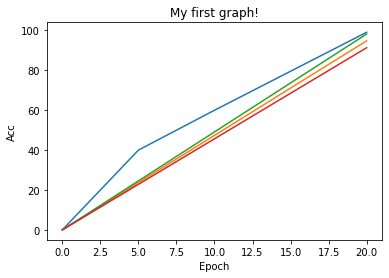

In [84]:

# importing the required module
import matplotlib.pyplot as plt
  
# x axis values
#x = [0,2,3]
x= [0,5,10,20]
# corresponding y axis values
y = [0,40,60,99.114]

x2= [0,20]
# corresponding y axis values
y2 = [0,94.824]


x3= [0,20]
# corresponding y axis values
y3 = [0,98.238]


x4= [0,20]
# corresponding y axis values
y4 = [0,91.360]
  
  
# plotting the points 
plt.plot(x, y)
plt.plot(x2,y2)
plt.plot(x3, y3)
plt.plot(x4,y4)
  
  
# naming the x axis
plt.xlabel('Epoch')
# naming the y axis
plt.ylabel('Acc')
  
# giving a title to my graph
plt.title('My first graph!')
  
# function to show the plot
plt.show()